In [52]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [53]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
members = pd.read_csv("members.csv", parse_dates=['MSMTDATE1'], date_parser=dateparse)


expeds = pd.read_csv("exped.csv",parse_dates=['SMTDATE'], date_parser=dateparse)

peaks = pd.read_csv("peaks.csv", low_memory=False)

In [54]:
members.head()

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
0,AMAD78301,1,AMAD,1978,3,Jean Robert,Clemenson,M,0,12/30/1899,1938.0,40,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426937
1,AMAD78301,2,AMAD,1978,3,Bernard,Dufour,M,0,12/30/1899,1936.0,41,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426501
2,AMAD78301,3,AMAD,1978,3,Philippe,Gerard,M,0,12/30/1899,1950.0,27,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2431569
3,AMAD78301,4,AMAD,1978,3,Eric,Lasserre,M,0,12/30/1899,1937.0,40,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426809
4,AMAD78301,5,AMAD,1978,3,Guy,Peters,M,0,12/30/1899,1944.0,34,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2429215


In [55]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70133 entries, 0 to 70132
Data columns (total 74 columns):
EXPID         70133 non-null object
MEMBID        70133 non-null int64
PEAKID        70133 non-null object
MYEAR         70133 non-null int64
MSEASON       70133 non-null int64
FNAME         70028 non-null object
LNAME         69170 non-null object
SEX           70131 non-null object
AGE           70133 non-null int64
BIRTHDATE     70133 non-null object
YOB           64792 non-null float64
CALCAGE       70133 non-null int64
CITIZEN       70123 non-null object
STATUS        70111 non-null object
RESIDENCE     64668 non-null object
OCCUPATION    51554 non-null object
LEADER        70133 non-null bool
DEPUTY        70133 non-null bool
BCONLY        70133 non-null bool
NOTTOBC       70133 non-null bool
SUPPORT       70133 non-null bool
DISABLED      70133 non-null bool
HIRED         70133 non-null bool
SHERPA        70133 non-null bool
TIBETAN       70133 non-null bool
MSUCCESS     

In [56]:
pd.options.display.max_columns = 100

In [57]:
members.loc[(members['FNAME'] == 'Scott E.') & (members['LNAME'] == 'Fischer')]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
723,AMAD93101,1,AMAD,1993,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,37,USA,Leader,"Seattle, Washington",Alpine guide,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1993-04-24,12/30/1899,12/30/1899,1330.0,NaN,NaN,1,0,0,122,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433449
3633,BARU91101,1,BARU,1991,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,35,USA,Leader,"Seattle, Washington",Alpine guide,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,7152,1991-05-07,12/30/1899,12/30/1899,1100.0,NaN,NaN,1,0,0,23,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433489
9799,EVER87302,1,EVER,1987,3,Scott E.,Fischer,M,0,12/30/1899,1955.0,31,USA,Leader,"Seattle, Washington",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7500,1987-10-20,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,2,3,0,2433399
10158,EVER89101,6,EVER,1989,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,33,USA,Climber,"Seattle, Washington",Alpine guide & director of adventure travel ag...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8500,1989-05-14,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,True,False,True,False,True,False,At & above C4,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,4,4,0,2433368
10554,EVER90107,7,EVER,1990,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,34,USA,Climber,"Seattle, Washington",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,17,0,2433552
11874,EVER94108,2,EVER,1994,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,38,USA,Climbing Leader,"Seattle, Washington",Alpine guide,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1994-05-09,12/30/1899,12/30/1899,910.0,NaN,NaN,1,0,0,189,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433429
12436,EVER96113,1,EVER,1996,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,40,USA,Leader,"Seattle, Washington",Alpine guide,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,True,05/11/1996,1200.0,3,8400,5,True,True,False,12/30/1899,NaN,0,0,Died of exposure/ams (last seen alive by Sherp...,NaN,NaN,5,1,0,2433389
13325,FANG84301,2,FANG,1984,3,Scott E.,Fischer,M,0,12/30/1899,1955.0,28,USA,Climber,"Kent, Washington",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,7315,1984-10-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,N

In [58]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961.0,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953.0,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960.0,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961.0,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN


In [59]:
members.loc[members['EXPID'] == 'EVER96113']

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
12433,EVER96113,2,EVER,1996,1,Martin,Adams,M,0,12/30/1899,1949.0,46,USA,Climber,"Houston, Texas",Investor,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2431159
12434,EVER96113,3,EVER,1996,1,Neal Jay,Beidleman,M,0,12/30/1899,1959.0,36,USA,Climber,"Aspen, Colorado",Engineer & alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2434737
12435,EVER96113,4,EVER,1996,1,Anatoli,Boukreev,M,0,12/30/1899,1958.0,38,Kazakhstan,Climber,"Almaty (Alma-Ata), Kazakhstan",Alpinist,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2434140
12436,EVER96113,1,EVER,1996,1,Scott E.,Fischer,M,0,12/30/1899,1955.0,40,USA,Leader,"Seattle, Washington",Alpine guide,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,True,05/11/1996,1200.0,3,8400,5,True,True,False,12/30/1899,NaN,0,0,Died of exposure/ams (last seen alive by Sherp...,NaN,NaN,5,1,0,2433389
12437,EVER96113,5,EVER,1996,1,Charlotte Conant,Fox,F,0,12/30/1899,1957.0,39,USA,Climber,"Aspen, Colorado",Ski patroller & investor,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433890
12438,EVER96113,10,EVER,1996,1,Sandra Hill (Sandy),Pittman,F,0,12/30/1899,1955.0,41,USA,Climber,"New York, New York",Writer,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,8850,1996-05-10,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,227,0,0,True,False,True,False,True,False,In C3 & above,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433133
12439,EVER96113,7,EVER,1996,1,Karen Ingrid,Hunt,F,0,12/30/1899,1963.0,32,USA,Exp Doctor,"Berlin, New Hampshire",Physician,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,17,0,2436305
12440,EVER96113,8,EVER,1996,1,Dale,Kruise,M,0,12/30/1899,1952.0,44,USA,Climber,"Craig, Colorado",Dentist,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6100,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12

In [60]:
members.groupby(['DEATHTYPE']).size().reset_index(name='counts')

,DEATHTYPE,counts
0,0,69082
1,1,91
2,2,32
3,3,40
4,4,318
5,5,25
6,6,16
7,7,359
8,8,26
9,9,48


In [61]:
members.loc[members['DEATH']==True].groupby(['PEAKID']).size().reset_index(name='counts')

,PEAKID,counts
0,AMAD,28
1,ANN1,71
2,ANN2,6
3,ANN3,9
4,ANN4,5
5,ANNE,1
6,ANNM,3
7,ANNS,8
8,APIM,4
9,BARU,13


In [62]:
members['month'] = members['MSMTDATE1'].dt.strftime('%m')

In [63]:
members['day'] = members['MSMTDATE1'].dt.strftime('%d')

In [64]:
members.head()

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
0,AMAD78301,1,AMAD,1978,3,Jean Robert,Clemenson,M,0,12/30/1899,1938.0,40,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426937,1899-12-30 00:00:00,1899-12-30 00:00:00
1,AMAD78301,2,AMAD,1978,3,Bernard,Dufour,M,0,12/30/1899,1936.0,41,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426501,10,21
2,AMAD78301,3,AMAD,1978,3,Philippe,Gerard,M,0,12/30/1899,1950.0,27,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2431569,1899-12-30 00:00:00,1899-12-30 00:00:00
3,AMAD78301,4,AMAD,1978,3,Eric,Lasserre,M,0,12/30/1899,1937.0,40,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6000,1978-10-21,12/30/1899,12/30/1899,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2426809,10,21
4,AMAD78301,5,AMAD,1978,3,Guy,Peters,M,0,12/30/1899,1944.0,34,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1899-12-30 00:00:00,12/30/1899,12/30/1899,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,1,4,0,2429215,1899-12-30 00:00:00,1899-12-30 00:00:00


In [65]:
members.loc[members['MSMTDATE1']!='1899-12-30 00:00:00'].groupby(['month','day']).size().reset_index(name='counts')

,month,day,counts
0,01,01,3
1,01,02,13
2,01,03,24
3,01,04,23
4,01,05,6
5,01,06,24
6,01,07,4
7,01,08,12
8,01,09,2
9,01,10,15


In [66]:
members.loc[members['MSMTTIME1'].notnull()][:10]

,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM,month,day
9,AMAD79101,4,AMAD,1979,1,Jan Anders Martin,Boysen,M,0,12/30/1899,1941.0,37,W Germany,Climber,"Manchester, England",Biology teacher,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428189,04,22
10,AMAD79101,5,AMAD,1979,1,David Finlay,Breashears,M,0,12/30/1899,1955.0,23,USA,Climber,"Denver, Colorado",Alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2433325,04,22
15,AMAD79101,2,AMAD,1979,1,Thomas M. (Tom),Frost,M,0,12/30/1899,1936.0,42,USA,Climbing Leader,"Boulder, Colorado",Alpine-equipment salesman,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2426232,04,22
17,AMAD79101,10,AMAD,1979,1,Greg,Lowe,M,0,12/30/1899,1949.0,30,USA,Film Team,"Ogden, Utah",Photographer & climbing-equipment designer,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2430874,04,22
18,AMAD79101,11,AMAD,1979,1,Jeff,Lowe,M,0,12/30/1899,1950.0,28,USA,Climber,"Lafayette, Colorado",Alpine guide,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,04/30/1979,12/30/1899,1700.0,1300.0,NaN,1,2,0,2,4,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2431406,04,22
19,AMAD79101,12,AMAD,1979,1,Peter,Pilafian,M,0,12/30/1899,1943.0,35,USA,Film Team,"Jackson, Wyoming",Cinematographer; member of expedition's film team,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-22,12/30/1899,12/30/1899,1700.0,NaN,NaN,1,0,0,2,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2428844,04,22
20,AMAD79101,13,AMAD,1979,1,Doug,Robinson,M,0,12/30/1899,1945.0,33,USA,Climber,"Mammoth Lakes, California",Alpine guide & author,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-25,12/30/1899,12/30/1899,1500.0,NaN,NaN,1,0,0,3,0,0,False,True,False,False,False,False,NaN,False,12/30/1899,NaN,0,0,0,False,False,False,12/30/1899,NaN,0,0,NaN,NaN,NaN,5,1,0,2429578,04,25
22,AMAD79101,15,AMAD,1979,1,John,Wasson,M,0,12/30/1899,1949.0,29,USA,Climber/Kayaker,"Lakewood, Colorado",River guide; member of expedition's kayak team,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,6814,1979-04-25,12/30/1899,12/30/1899,1500.0,NaN,N

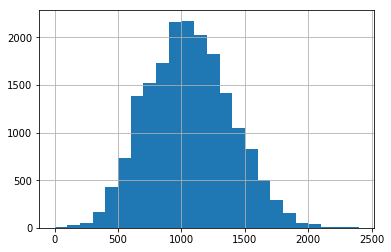

In [67]:
members.loc[members['MSMTTIME1'].notnull()]['MSMTTIME1'].hist(bins=24,range=[0, 2400])

In [68]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961.0,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953.0,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960.0,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961.0,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN


In [69]:
peaks.loc[peaks['HEIGHTM'] > 8000]

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
6,ANNE,Annapurna I - East Smt,NaN,Annapurna Himal (ENE of Annapurna I),8026,26332,1,5,True,False,False,NaN,Requires permit for Annapurna I,1,2,NaN,1974.0,1,ANNE74101,Apr 29,Spain,"Jose Manuel Anglada Nieto, Jorge Pons Sangines...",NaN,NaN,NaN
7,ANNM,Annapurna I - Middle Smt,NaN,Annapurna Himal (ENE of Annapurna I),8051,26414,1,5,True,False,False,NaN,Requires permit for Annapurna I,1,2,NaN,1980.0,3,ANNM80301,Oct 03,W Germany,"Udo Boening, Ludwig Greissl, Heinz Oberrauch",NaN,NaN,NaN
20,CHOY,Cho Oyu,NaN,Khumbu Himal (NW of Everest on Tibetan border),8188,26864,12,2,True,False,False,NaN,NaN,4,2,NaN,1954.0,3,CHOY54301,Oct 19,"Austria, Nepal","Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,NaN,NaN
30,DHA1,Dhaulagiri I,NaN,Dhaulagiri Himal,8167,26795,4,6,True,False,False,NaN,NaN,1,2,NaN,1960.0,1,DHA160101,May 13,"Switzerland, Austria, W Germany, Nepal","Peter Diener, Kurt Diemberger, Albin Schelbert...",NaN,NaN,NaN
42,EVER,Everest,"Sagarmatha, Chomolungma, Qomolungma",Khumbu Himal,8850,29035,12,2,True,False,False,NaN,NaN,4,2,NaN,1953.0,1,EVER53101,May 29,"New Zealand, India","Edmund Hillary, Tenzing Norgay Sherpa",NaN,NaN,NaN
89,KANC,Kangchenjunga Central,NaN,Kangchenjunga Himal (between Main and South su...,8473,27799,9,1,True,False,False,NaN,NaN,5,2,NaN,1978.0,1,KANC78102,May 22,Poland,"Wojciech Branski, Zygmunt Heinrich, Kazimierz ...",Illegal ascent,NaN,NaN
91,KANG,Kangchenjunga,NaN,Kangchenjunga Himal,8586,28169,9,1,True,False,False,NaN,NaN,5,2,NaN,1955.0,1,KANG55101,May 25,UK,"George Band, Joe Brown",NaN,NaN,NaN
92,KANS,Kangchenjunga South,NaN,Kangchenjunga Himal,8476,27808,9,1,True,False,False,NaN,NaN,5,2,NaN,1978.0,1,KANS78101,May 19,Poland,"Eugeniusz Chrobak, Wojciech Wroz",NaN,NaN,NaN
112,LHOT,Lhotse,NaN,Khumbu Himal,8516,27940,12,2,True,False,False,NaN,NaN,4,2,NaN,1956.0,1,LHOT56101,May 18,Switzerland,"Fritz Luchsinger, Ernst Reiss",NaN,NaN,NaN


In [70]:
peaks['PYEAR']= peaks['PYEAR'].fillna(0).astype(int).astype(str)
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN


In [71]:
peaks.loc[peaks['HEIGHTM'] > 8000]

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN
6,ANNE,Annapurna I - East Smt,NaN,Annapurna Himal (ENE of Annapurna I),8026,26332,1,5,True,False,False,NaN,Requires permit for Annapurna I,1,2,NaN,1974,1,ANNE74101,Apr 29,Spain,"Jose Manuel Anglada Nieto, Jorge Pons Sangines...",NaN,NaN,NaN
7,ANNM,Annapurna I - Middle Smt,NaN,Annapurna Himal (ENE of Annapurna I),8051,26414,1,5,True,False,False,NaN,Requires permit for Annapurna I,1,2,NaN,1980,3,ANNM80301,Oct 03,W Germany,"Udo Boening, Ludwig Greissl, Heinz Oberrauch",NaN,NaN,NaN
20,CHOY,Cho Oyu,NaN,Khumbu Himal (NW of Everest on Tibetan border),8188,26864,12,2,True,False,False,NaN,NaN,4,2,NaN,1954,3,CHOY54301,Oct 19,"Austria, Nepal","Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,NaN,NaN
30,DHA1,Dhaulagiri I,NaN,Dhaulagiri Himal,8167,26795,4,6,True,False,False,NaN,NaN,1,2,NaN,1960,1,DHA160101,May 13,"Switzerland, Austria, W Germany, Nepal","Peter Diener, Kurt Diemberger, Albin Schelbert...",NaN,NaN,NaN
42,EVER,Everest,"Sagarmatha, Chomolungma, Qomolungma",Khumbu Himal,8850,29035,12,2,True,False,False,NaN,NaN,4,2,NaN,1953,1,EVER53101,May 29,"New Zealand, India","Edmund Hillary, Tenzing Norgay Sherpa",NaN,NaN,NaN
89,KANC,Kangchenjunga Central,NaN,Kangchenjunga Himal (between Main and South su...,8473,27799,9,1,True,False,False,NaN,NaN,5,2,NaN,1978,1,KANC78102,May 22,Poland,"Wojciech Branski, Zygmunt Heinrich, Kazimierz ...",Illegal ascent,NaN,NaN
91,KANG,Kangchenjunga,NaN,Kangchenjunga Himal,8586,28169,9,1,True,False,False,NaN,NaN,5,2,NaN,1955,1,KANG55101,May 25,UK,"George Band, Joe Brown",NaN,NaN,NaN
92,KANS,Kangchenjunga South,NaN,Kangchenjunga Himal,8476,27808,9,1,True,False,False,NaN,NaN,5,2,NaN,1978,1,KANS78101,May 19,Poland,"Eugeniusz Chrobak, Wojciech Wroz",NaN,NaN,NaN
112,LHOT,Lhotse,NaN,Khumbu Himal,8516,27940,12,2,True,False,False,NaN,NaN,4,2,NaN,1956,1,LHOT56101,May 18,Switzerland,"Fritz Luchsinger, Ernst Reiss",NaN,NaN,NaN


In [72]:
peaks['firstsummitdate'] =  pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', errors='ignore')

In [73]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


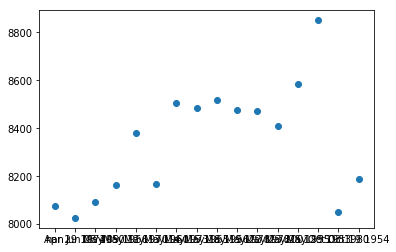

In [74]:
plt.scatter(peaks['firstsummitdate'].loc[peaks['HEIGHTM']>8000].tolist(), peaks['HEIGHTM'].loc[peaks['HEIGHTM']>8000])
plt.show()

In [75]:
peaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 26 columns):
PEAKID             457 non-null object
PKNAME             457 non-null object
PKNAME2            232 non-null object
LOCATION           457 non-null object
HEIGHTM            457 non-null int64
HEIGHTF            457 non-null int64
HIMAL              457 non-null int64
REGION             457 non-null int64
OPEN               457 non-null bool
UNLISTED           457 non-null bool
TREKKING           457 non-null bool
TREKYEAR           29 non-null float64
RESTRICT           267 non-null object
PHOST              457 non-null int64
PSTATUS            457 non-null int64
PEAKMEMO           0 non-null float64
PYEAR              457 non-null object
PSEASON            457 non-null int64
PEXPID             302 non-null object
PSMTDATE           299 non-null object
PCOUNTRY           303 non-null object
PSUMMITERS         455 non-null object
PSMTNOTE           69 non-null object
REFERMEMO    

In [76]:
unclimbed = peaks.loc[peaks['PSTATUS'] == 1]

In [77]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [78]:
climbed.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [79]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [80]:
climbed = peaks.loc[peaks['PSTATUS'] == 2]

In [81]:
climbed.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [82]:
peaks['firstsummitdate'] = pd.to_datetime(peaks['PSMTDATE'] + " " + peaks['PYEAR'], format='%b %d %Y', exact=False, errors='ignore')

In [83]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [84]:
peaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 26 columns):
PEAKID             457 non-null object
PKNAME             457 non-null object
PKNAME2            232 non-null object
LOCATION           457 non-null object
HEIGHTM            457 non-null int64
HEIGHTF            457 non-null int64
HIMAL              457 non-null int64
REGION             457 non-null int64
OPEN               457 non-null bool
UNLISTED           457 non-null bool
TREKKING           457 non-null bool
TREKYEAR           29 non-null float64
RESTRICT           267 non-null object
PHOST              457 non-null int64
PSTATUS            457 non-null int64
PEAKMEMO           0 non-null float64
PYEAR              457 non-null object
PSEASON            457 non-null int64
PEXPID             302 non-null object
PSMTDATE           299 non-null object
PCOUNTRY           303 non-null object
PSUMMITERS         455 non-null object
PSMTNOTE           69 non-null object
REFERMEMO    

In [85]:
expeds.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,03/15/1960,1960-05-17,1530.0,63,0,12/30/1899,1,NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2442047
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,09/25/1969,1969-10-22,1800.0,27,31,10/26/1969,1,NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",NaN,Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,03/16/1973,1973-05-06,2030.0,51,0,12/30/1899,1,NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2446797
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,09/08/1978,1978-10-02,NaN,24,27,10/05/1978,4,Abandoned at 7000m (on A-IV) due to bad weather,7000,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2448822
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,NaN,NaN,UK,Paul Moores,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Pokhara->Marshyangdi->Pisang->Sabje Khola,12/30/1899,1979-10-18,NaN,0,0,10/20/1979,4,Abandoned at 7160m due to high winds,7160,False,False,False,0,0,3,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(3500m),ABC,Biv1,Biv2,Biv3,Biv4,Biv5,xxx(18/...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2449204


In [86]:
datetime.strptime('Jun 03 1950', '%b %d %Y')

datetime.datetime(1950, 6, 3, 0, 0)

In [87]:
expeds.loc[(expeds['PEAKID'] == 'ANN1') & (expeds['SMTDATE'] < datetime.strptime('Jun 03 1950', '%b %d %Y'))]

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
87,ANN188102,ANN1,1988,1,1,N Face,NaN,NaN,NaN,Mexico,Roberto Morales,Mexican Expedition to Annapurna,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Kali Gandaki,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,11,Did not reach BC,0,False,False,False,0,0,5,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Asian Trekking,False,True,False,False,False,NaN,5003
2524,ANN165101,ANN1,1965,1,1,E Ridge,NaN,NaN,NaN,W Germany,Guenter Hauser,German Alpine Association,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,04/06/1965,1899-12-30 00:00:00,NaN,0,58,06/03/1965,12,NaN,0,False,False,False,5,0,8,0,0,0,0,0,True,False,True,False,False,False,False,False,False,"Climbed Gangapurna (GANG-651-01), Glacier Dome...",NaN,NaN,NaN,NaN,NaN,False,False,True,True,True,GANG65101,4935
2528,ANN165201,ANN1,1965,2,1,Reconnaissance,NaN,NaN,NaN,Iran,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,12,NaN,0,False,False,False,0,0,4,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,4935
2665,ANN161101,ANN1,1961,1,1,W side,NaN,NaN,NaN,W Germany,Fritz Stammberger,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,14,Termination reason unknown,6000,False,False,False,0,0,1,0,0,0,0,0,False,False,True,False,False,False,False,False,False,NaN,xxx(6000m),NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,4931
2666,ANN170301,ANN1,1970,3,1,N Face,NaN,NaN,NaN,Spain,"Jorge Matas, Manuel Martin",NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,12,NaN,0,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,Illegal ascent of Nilgiri E Peak (1st),NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,4940
2668,ANN186305,ANN1,1986,3,1,S Face,NaN,NaN,NaN,Poland,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,12,Did not attempt climb,0,False,False,False,0,0,0,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,None,False,False,False,False,False,NaN,5001
8852,ANN115107,ANN1,2015,1,1,N Face,NaN,NaN,NaN,USA,Don Bowie,American Annapurna I Expedition 2015,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,14,Abandoned due to earthquake,0,False,False,False,0,0,4,0,0,0,0,0,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Seven Summit Treks,False,True,False,False,False,NaN,4985
8855,ANN115106,ANN1,2015,1,1,N Face,NaN,NaN,NaN,Spain,Carlos Soria,Carlos Soria-BBVA Annapurna I Expedition 2015,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,By helicopter from Kathamandu via Samagaon,03/10/2015,1899-12-30 00:00:00,NaN,0,0,12/30/1899,5,"Abandoned at 6500m due to bad weather, deep sn...",6500,False,False,False,3,0,5,0,0,7,0,0,True,False,True,False,False,False,False,True,False,NaN,"BC(10/03,4200m),C1(19/03,5200m),C2(21/03,5500m...",NaN,NaN,NaN,Thamserku Trekking,False,True,False,False,False,NaN,4985
9061,ANN115401,ANN1,2015,4,1,N Face,NaN,NaN,NaN,Norway,Tore Sunde-Rasmussen,Ascent Himalayas Norwegian-Irish Annapurna I E...,False,False,False,False,NaN,NaN,NaN,NaN,False,False,Ireland,NaN,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,4,Aban

In [88]:
expeds.loc[(expeds['PEAKID'] == 'EVER') & (expeds['YEAR'] < 1955)]

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
2754,EVER21101,EVER,1921,1,2,"W, N & E sides",NaN,NaN,NaN,UK,C. K. Howard-Bury,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,Canada,Sikkim->Chumbi Valley->Tibet,06/26/1921,1921-09-24,NaN,90,96,09/30/1921,12,Reconnaissance,7000,False,False,False,0,0,9,0,1,21,0,1,False,False,True,False,False,False,False,True,False,NaN,"BC(26/06),ABC(29/06),xxx(24/09,7000m)",NaN,Kellas and 1 porter died on approach march,Reached N Col at 7000m,NaN,False,False,False,False,False,NaN,2424968
2755,EVER22101,EVER,1922,1,2,N Col-N Face,NaN,NaN,NaN,UK,Charles G. Bruce,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,Australia,Sikkim->Chumbi Valley->Tibet,05/01/1922,1922-05-27,NaN,26,44,06/14/1922,7,Abandoned at 8350m due to exhaustion and [late...,8320,False,False,False,5,0,13,0,0,30,0,7,False,True,False,True,False,False,False,False,False,NaN,"BC(01/05,5000m),C1(5100m),C2(5800m),C3(6400m),...",NaN,7 Sherpas killed in avalanche below N Col,NaN,NaN,False,False,False,False,False,NaN,2425214
2756,EVER24101,EVER,1924,1,2,N Col-N Face (Norton to 8570m),N Col-N Ridge (Mallory to 8450m+),NaN,NaN,UK,Edward F. Norton,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Sikkim->Chumbi Valley->Tibet,04/28/1924,1924-06-08,NaN,41,48,06/15/1924,6,Abandoned at 8600m after the disappearance of ...,8600,False,False,False,6,0,11,0,2,40,0,2,False,True,False,True,False,False,False,False,False,NaN,"BC(28/04,5000m),C1(30/04,5400m),C2(02/05,6000m...",NaN,Mallory and Irvine disappeared (fall?); 1 port...,Possible success by Mallory and Irvine?,NaN,False,False,False,False,False,NaN,2425959
2757,EVER33101,EVER,1933,1,2,N Col-N Face,NaN,NaN,NaN,UK,Hugh Ruttledge,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Sikkim->Chumbi Valley->Tibet,04/17/1933,1933-05-30,NaN,43,76,07/02/1933,10,NaN,8570,False,False,False,6,0,16,0,0,50,0,0,False,False,True,False,False,False,False,True,False,NaN,"BC(17/04,5000m),C1(21/04,5400m),C2(26/04,6035m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2429246
2758,EVER34101,EVER,1934,1,2,N Col,NaN,NaN,NaN,UK,Maurice Wilson,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,NaN,04/14/1934,1934-05-24,NaN,40,0,12/30/1899,6,NaN,6900,False,False,False,0,0,1,0,1,2,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(14/04,5000m),C1(17/04,5400m),C2(18/04,6035m...",NaN,Wilson's death,NaN,NaN,False,False,False,False,False,NaN,2429606
2759,EVER35201,EVER,1935,2,2,N Col (recon to 7000m),W side (recon),NaN,NaN,UK,Eric Shipton,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,New Zealand,Sikkim->Chumbi Valley->Tibet,07/06/1935,1935-07-12,NaN,6,39,08/14/1935,5,NaN,7000,False,False,False,4,0,7,0,0,16,0,0,False,False,True,False,False,False,False,False,False,"Climbed Lingtren (LING-352-01), attempted Chan...","BC(06/07,5000m),C1(06/07,5000m),C2(07/07,6035m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2430021
2760,EVER36101,EVER,1936,1,2,N Col,NaN,NaN,NaN,UK,Hugh Ruttledge,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Sikkim->Chumbi Valley->Tibet,04/26/1936,1936-05-14,NaN,18,52,06/17/1936,4,NaN,7000,False,False,False,4,0,12,0,0,65,0,0,False,False,True,False,False,False,False,False,False,Attempted Changtse (CTSE-361-01),"BC(26/04,5000m),C1(27/04,5400m),C2(06/05,6035m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2430329
2761,EVER38101,EVER,1938,1,2,E Rongbuk Glacier-N Col,Main Rongbuk Glacier-N Col-N Face,NaN,NaN,UK,H. W. Tilman,NaN,False,False,Fals

In [89]:
expeds.loc[(expeds['PEAKID'] == 'CHOY') & (expeds['YEAR'] < 1955)]

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
2692,CHOY51301,CHOY,1951,3,1,Nangpa La (recon),NaN,NaN,NaN,UK,Eric Shipton,British Reconnaissance to Mt. Everest,False,False,False,False,NaN,NaN,NaN,NaN,False,False,New Zealand,Thami->Nangpa La,12/30/1899,1899-12-30 00:00:00,NaN,0,0,12/30/1899,12,NaN,5800,False,False,False,0,0,6,0,0,0,0,0,True,False,True,False,False,False,False,False,False,Recon Everest (EVER-513-01) and Pumori (PUMO-5...,"xxx(Nov,5800m)",NaN,NaN,NaN,NaN,False,False,False,False,True,EVER51301,5596
2693,CHOY52101,CHOY,1952,1,1,W Ridge-W Face,NaN,NaN,NaN,UK,Eric Shipton,British Expedition to Cho Oyu,False,False,False,False,NaN,NaN,NaN,NaN,False,False,"Canada, New Zealand",Nangpa La,05/05/1952,1952-05-09,NaN,4,5,05/10/1952,10,\r,6800,False,False,False,2,0,10,0,0,18,0,0,False,False,True,False,False,False,False,False,False,Climbed Ripimo Shar (RIPI-521-01) and Palung R...,"BC(05/05,5700m),C1(06/05,5800m),C2(07/05,6400m...",NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,2439739
2694,CHOY54301,CHOY,1954,3,1,W Ridge-W Face from S (Tichy Rte),NaN,NaN,NaN,Austria,Herbert Tichy,"Austrian Cho Oyu Expedition, 1954",True,False,False,False,1st,NaN,NaN,NaN,False,False,NaN,Namche->Nangpa La,09/27/1954,1954-10-19,1500.0,22,27,10/24/1954,1,NaN,8188,False,False,False,4,0,3,2,0,7,1,0,False,False,True,False,False,False,False,False,False,Mount Tyrol (1st ascent),"BC(27/09,5485m),C1(29/09,5800m),C2(30/09,6200m...",NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,2440634
2695,CHOY54302,CHOY,1954,3,1,W Ridge-W Face,NaN,NaN,NaN,Switzerland,Raymond Lambert,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,France,Namche->Nangpa La,10/11/1954,1954-10-28,NaN,17,21,11/01/1954,4,Abandoned at 7700m due to onset of storms,7700,False,False,False,4,0,7,0,0,9,0,0,False,False,True,False,False,False,False,False,False,Recon Gaurishankar (GAUR-543-01) and Melungtse,"BC(11/10,5640m),C1(14/10,6090m),C2(16/10,6480m...",NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,2440643


In [90]:
merged = expeds.merge(peaks, how='left', on="PEAKID")

In [91]:
merged.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,03/15/1960,1960-05-17,1530.0,63,0,12/30/1899,1,NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2442047,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,09/25/1969,1969-10-22,1800.0,27,31,10/26/1969,1,NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",NaN,Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,03/16/1973,1973-05-06,2030.0,51,0,12/30/1899,1,NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2446797,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,09/08/1978,1978-10-02,NaN,24,27,10/05/1978,4,Abandoned at 7000m (on A-IV) due to bad weather,7000,False,False,False,0,0,2,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2448822,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,NaN,NaN,UK,Paul Moores,NaN,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Pokhara->Marshyangdi->Pisang->Sabje Khola,12/30/1899,1979-10-18,NaN,0,0,10/20/1979,4,Abandoned at 7160m due to high winds,7160,False,False,False,0,0,3,0,0,0,0,0,True,False,True,False,False,False,False,False,False,NaN,"BC(3500m),ABC,Biv1,Biv2,Biv3,Biv4,Biv5,xxx(18/...",NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,2449204,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,N

In [92]:
merged['expeddate'] = pd.to_datetime(merged['SMTDATE'], '%Y-%m-%d')

In [93]:
merged = merged[pd.notnull(merged['SMTDATE'])]
merged['PYEAR'] = merged['PYEAR'].astype(int).astype(str)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9608
Data columns (total 92 columns):
EXPID              9609 non-null object
PEAKID             9609 non-null object
YEAR               9609 non-null int64
SEASON             9609 non-null int64
HOST               9609 non-null int64
ROUTE1             9480 non-null object
ROUTE2             302 non-null object
ROUTE3             30 non-null object
ROUTE4             5 non-null object
NATION             9609 non-null object
LEADERS            9583 non-null object
SPONSOR            8785 non-null object
SUCCESS1           9609 non-null bool
SUCCESS2           9609 non-null bool
SUCCESS3           9609 non-null bool
SUCCESS4           9609 non-null bool
ASCENT1            2680 non-null object
ASCENT2            100 non-null object
ASCENT3            11 non-null object
ASCENT4            4 non-null object
CLAIMED            9609 non-null bool
DISPUTED           9609 non-null bool
COUNTRIES          3073 non-null object


In [94]:
merged['firstsummitdate'] = pd.to_datetime(merged['PSMTDATE'] + " " + merged['PYEAR'],errors="coerce")

In [95]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9608
Data columns (total 92 columns):
EXPID              9609 non-null object
PEAKID             9609 non-null object
YEAR               9609 non-null int64
SEASON             9609 non-null int64
HOST               9609 non-null int64
ROUTE1             9480 non-null object
ROUTE2             302 non-null object
ROUTE3             30 non-null object
ROUTE4             5 non-null object
NATION             9609 non-null object
LEADERS            9583 non-null object
SPONSOR            8785 non-null object
SUCCESS1           9609 non-null bool
SUCCESS2           9609 non-null bool
SUCCESS3           9609 non-null bool
SUCCESS4           9609 non-null bool
ASCENT1            2680 non-null object
ASCENT2            100 non-null object
ASCENT3            11 non-null object
ASCENT4            4 non-null object
CLAIMED            9609 non-null bool
DISPUTED           9609 non-null bool
COUNTRIES          3073 non-null object


In [96]:
beforesummit = merged.loc[merged['HEIGHTM'] > 8000].loc[((merged['expeddate'] <= merged['firstsummitdate']) & (merged['expeddate'] != datetime.strptime('1899-12-30 00:00:00', '%Y-%m-%d %H:%M:%S')))  | (merged['YEAR'] < merged['PYEAR'].astype(int))] 

In [97]:
beforesummit.to_csv("beforesummit.csv")

In [98]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [99]:
peaks['REGION'].unique()

array([2, 5, 7, 4, 3, 6, 1])

In [100]:
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961


In [102]:
geocodedpeaks = pd.read_csv('geocodedpeaks.csv')

In [103]:
geocodedpeaks.head()

,Unnamed: 0,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
0,0,APPROXIMATE,"Ama Dablam, Khumjung 56000, Nepal",ChIJPSR3_fQA6TkRCwmkOk-rmqE,Ama Dablam,27.861875,86.8611631,1,56000,OK,"establishment,natural_feature"
1,1,NaN,NaN,NaN,Amphu Gyabjen,27.878611,86.871389,0,NaN,ZERO_RESULTS,NaN
2,2,APPROXIMATE,"Annapurna, Narchyang, Nepal",ChIJ94QfBUQcvjkR-zkLX9K-HJQ,Annapurna I,28.596111,83.820278,1,NaN,OK,"establishment,natural_feature"
3,3,APPROXIMATE,"Annapurna II, Pisang 33500, Nepal",ChIJ_RjyDu6HlTkR57RJ_hTlGtA,Annapurna II,28.535000,84.1224999,1,33500,OK,"establishment,natural_feature"
4,4,APPROXIMATE,"Annapurna III, Machhapuchchhre 33700, Nepal",ChIJaRhQjuEgvjkRncMG76M7Y1M,Annapurna III,28.585000,83.9908333,1,33700,OK,"establishment,natural_feature"


In [104]:
geocodedpeaks = geocodedpeaks.rename(columns = {'input_string':'PKNAME'})

In [ ]:
geocodedpeaks.head()

In [106]:
mergedpeaks = peaks.merge(geocodedpeaks)

In [ ]:
peaks.shape

In [107]:
mergedpeaks.to_csv("geocodedpeaksfinal.csv")

In [109]:
gpf = pd.read_csv("geocodedpeaksfinal.csv")

In [110]:
gpf.head()

,Unnamed: 0,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,firstsummitdate,Unnamed: 0.1,accuracy,formatted_address,google_place_id,latitude,longitude,number_of_results,postcode,status,type
0,0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,NaN,1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,NaN,Mar 13 1961,0,APPROXIMATE,"Ama Dablam, Khumjung 56000, Nepal",ChIJPSR3_fQA6TkRCwmkOk-rmqE,27.861875,86.8611631,1,56000,OK,"establishment,natural_feature"
1,1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,NaN,1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN,Apr 11 1953,1,NaN,NaN,NaN,27.878611,86.871389,0,NaN,ZERO_RESULTS,NaN
2,2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,NaN,1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,NaN,NaN,Jun 03 1950,2,APPROXIMATE,"Annapurna, Narchyang, Nepal",ChIJ94QfBUQcvjkR-zkLX9K-HJQ,28.596111,83.820278,1,NaN,OK,"establishment,natural_feature"
3,3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,NaN,1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,NaN,NaN,May 17 1960,3,APPROXIMATE,"Annapurna II, Pisang 33500, Nepal",ChIJ_RjyDu6HlTkR57RJ_hTlGtA,28.535000,84.1224999,1,33500,OK,"establishment,natural_feature"
4,4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,NaN,1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,NaN,May 06 1961,4,APPROXIMATE,"Annapurna III, Machhapuchchhre 33700, Nepal",ChIJaRhQjuEgvjkRncMG76M7Y1M,28.585000,83.9908333,1,33700,OK,"establishment,natural_feature"


In [111]:
peaks['LOCATION'].unique()

array(['Khumbu Himal', 'Khumbu Himal (N of Ama Dablam)', 'Annapurna Himal',
       'Annapurna Himal (ENE of Annapurna I)',
       'Annapurna Himal (S of Annapurna I and Fang)', 'Api Himal',
       'Api Himal (W of Api)', 'Khumbu Himal (W of Makalu)',
       'Mansiri Himal (SE of Manaslu and Himalchuli)',
       'Jugal Himal (NNW of Dorje Lhakpa)',
       'Damodar Himal (NE of Thorong La near Tibetan border)',
       'Api Himal (S of Nampa)',
       'Khumbu Himal (in Hongku Valley, SW of Makalu)',
       'Changla Himal (N of Jumla on Tibetan border)', 'Shringi Himal',
       'Peri Himal (ESE of Himlung Himal on Tibetan border)',
       'Khumbu Himal (NW of Everest on Tibetan border)',
       'Rolwaling Himal (NE of Tsho Rolpa)', 'Khumbu Himal (N of Tawoche)',
       'Khumbu Himal (S of Shartse, N of Baruntse)',
       'Damodar Himal (E of Thorong La)',
       'Rolwaling Himal (WSW of Tesi Laptsa)',
       'Dhaulagiri Himal (NW of Dhaulagiri VI)',
       'Kangchenjunga Himal (W of Nepal 

In [112]:
peaks['HEIGHTM'].describe()

count     457.000000
mean     6655.761488
std       572.462986
min      5407.000000
25%      6235.000000
50%      6556.000000
75%      6908.000000
max      8850.000000
Name: HEIGHTM, dtype: float64

In [116]:
expeds.shape

(9609, 66)